In [60]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from scipy import stats

# Problem 1
## For the below python program, the following occurs and is true:  
### main()
The main method first calls the 'helper methods': *sigma_z_table_verification* and *probability_z_table_verification*
### sigma_z_table_verification()
The first thing that happens is I create a list of integers as are found in the Z Table:  
0,.1,.2,.3,.4,.5,.6,.7,.8,.9  
It loops through each value in this list, and each value is then evaluated through *stats.norm.cdf*  
As it loops, it is appended to a list called *probabilityValues*, because the return of putting a sigma through *stats.norm.cdf* is the probability of that sigma.   
It returns the list of probabilities which is then used by *probability_z_table_verification*  
### probability_z_table_verification()  
This method accepts a list of values that are assumed to be probabilities. In this case, I've used the return values found in *sigma_z_table_verification* to verify how trustworthy *stats.norm.ppf* is as compared to the Z Table.  
Each value in *probabilityValues* is evaluated through *stats.norm.ppf*, and is then appended to *sigmaValues*, which is returned for printing purposes. The values returned appear to have rounding errors which can be expected when using other people's libraries if they aren't evaluating exact numbers (such as evaluating and using 1.41 as opposed to sqrt(2))  
### Part D write-up:  
We did not receive minus signs with the methods we used. However, had we received a negative sigma, we could have just forced the absolute value on the returned sigma values to 'handle' it. It isn't an error or problem and doesn't necessarily need to be handled. This is because any Xsigma to the left (negative sigma) or Xsigma to the right (positive sigma) of the mean will still return the same probability.

In [55]:
def sigma_z_table_verification():
    sigmaValues=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9]
    probabilities = []
    
    for sigma in sigmaValues:
        probability = stats.norm.cdf(sigma)
        probabilities.append(probability)
     
    return probabilities


def probability_z_table_verification(probabilityValues):
    sigmaValues = []
    
    for probability in probabilityValues:
        sigmaValue = stats.norm.ppf(probability)
        sigmaValues.append(sigmaValue)
        
    return sigmaValues

def main():
    p = sigma_z_table_verification()
    print(f"Probabilities returned after being evaluated through stats.norm.cdf:\n{p}")
    s = probability_z_table_verification(p) 
    print(f"\n\nSigmas returned after being evalutated through stats.norm.ppf:\n{s}\n\n")


if __name__ == '__main__':
    main()

Probabilities returned after being evaluated through stats.norm.cdf:
[0.5, 0.539827837277029, 0.579259709439103, 0.6179114221889526, 0.6554217416103242, 0.6914624612740131, 0.7257468822499265, 0.758036347776927, 0.7881446014166034, 0.8159398746532405]


Sigmas returned after being evalutated through stats.norm.ppf:
[0.0, 0.10000000000000002, 0.1999999999999999, 0.2999999999999998, 0.4000000000000001, 0.5000000000000001, 0.6000000000000001, 0.7, 0.8000000000000002, 0.8999999999999999]




# Problem 2
## Rayleigh Distribution
### The Rayleigh distribution is a continuous probability distribution for nonnegative-valued random variables often observed when the overall magnitude of a vector is related to its directional components.
Is significant for things like wave heights, sound/light radiation, or the lifetime of an object (when the lifetime depends on the object's age)
### The *rayleigh_dist* method  
The output of the method *rayleigh_dist* shows a normalized histogram of 100000 points in a Rayleigh distribution. The analytic pdf() is on top to show that the histogram is the expected shape of a Rayleigh distribution.

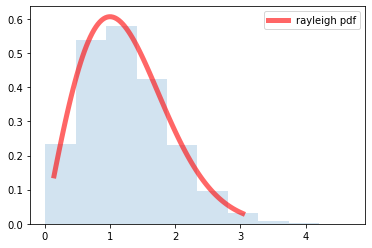

In [56]:
def rayleigh_dist():
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(stats.rayleigh.ppf(0.01),stats.rayleigh.ppf(0.99), 100)
    ax.plot(x, stats.rayleigh.pdf(x),'r-', lw=5, alpha=0.6, label='rayleigh pdf')
    rv = stats.rayleigh()
    vals = stats.rayleigh.ppf([0.001, 0.5, 0.999])
    r = stats.rayleigh.rvs(size=100000)
    ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
    ax.legend(loc='best')
    
    
def main():
    rayleigh_dist()


if __name__ == '__main__':
    main()

# Problem 3
## Part A
I will select the arbitrary number of 2
## Part B
What is the probability of observing a signal at 2 on signal-free data?
## Part C
p = $\int_2^\infty pdf(x)\mathrm{d}x$

In [57]:
def main():
    probability = stats.rayleigh.pdf(2)
    ppf = stats.rayleigh.ppf(probability)
    cdf = stats.rayleigh.cdf(ppf)
    
    print(f"Part D Answer:\nprobability: {probability}\n\n")
    print(f"Part E Answer:\nsigma: {ppf}")
   
    
if __name__ == '__main__':
    main()

Part D Answer:
probability: 0.2706705664732254


Part E Answer:
sigma: 0.7945184091090876


# Non-continuous distributions  
# Poisson  
## Part A  
Poisson distribution: P(x; μ) = (e<sup>-μ</sup>) (μ<sup>x</sup>) / x! 
is used for a number of events that can occur within specified intervals (such as in a block of time, distance, area, or volume)   
In order for a variable k to be Poisson, it must:  
* Be an integer (IE not continuous)  
* The occurrence of one event does not affect the probability of another event  
* The rate at which events occur is constant  
* Two events cannot occur at the same instant  

## Part B  
Seen below are four graphs.  
μ (mu) is the mean. It also represents a known value within a specified constraint (time, distance, etc)  
x is the signal you'd like to find the probability for. This signal will represent a value within the same time constraint that is some nSigma away from μ.   
The probability is the likelihood that value will occur within that specified constraint. 

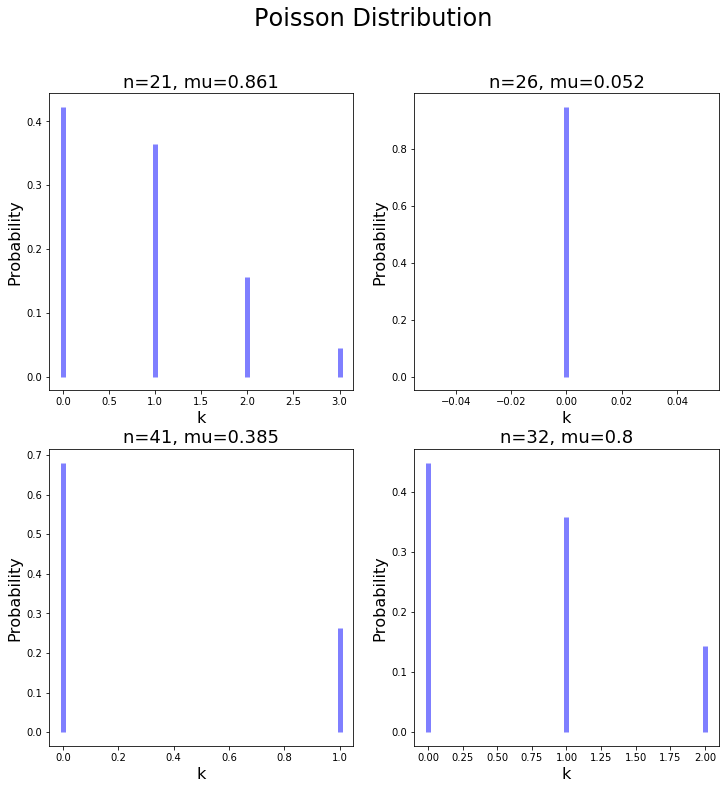

In [45]:
fig,ax = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Poisson Distribution', fontsize=24)
c = 0
for i in range(1,3):
    for j in range(1,3):
        n = np.random.randint(10,50)
        mu = np.random.random(1)[0]
        x = np.arange(stats.poisson.ppf(0.01,mu),stats.poisson.ppf(0.99,mu))
        ax[i-1,j-1].set_title(f'n={n}, mu={np.round(mu,decimals=3)}',size=18)
        ax[i-1,j-1].set_ylabel('Probability',size=16)
        ax[i-1,j-1].set_xlabel('k',size=16)
        ax[i-1,j-1].vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
        c+=1
plt.show()

## Part C
I found the fun fact: The average Google first page result contains 1,890 words. (Backlinko, 2016) (Source: https://www.hubspot.com/marketing-statistics)  
mu in this case is 1890 


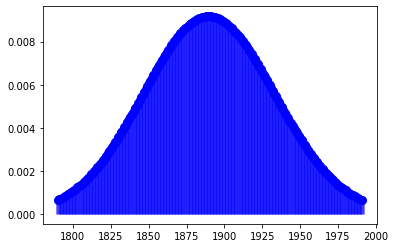

In [58]:
def main():
    fig, ax = plt.subplots(1, 1)
    mu = 1890
    x = np.arange(stats.poisson.ppf(0.01, mu),stats.poisson.ppf(0.99, mu))
    ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
    ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
    
    plt.show()
    
if __name__ == '__main__':
    main()    

I ask the question:  
#### What is the probability that the next google search I do ("Poisson Distribution") will have exactly 1975 words.  
* μ in this case will be 1890, the average page result contains 1890 words  
* x will be 1975 because we want to find the probability of my next search containing 2000 words on the first page  
#### p(1975; 1890) = 0.00137
You can see by the plot below that plugging in a value of 1975 into x (as opposed to a distribution of values), you get a y value (probability) that is slightly less than .0014

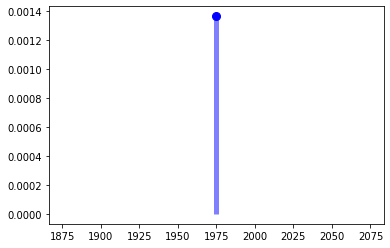

In [59]:
def main():
    fig, ax = plt.subplots(1, 1)
    mu = 1890
    x = 1975
    ax.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
    ax.vlines(x, 0, stats.poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
    
    plt.show()
    
if __name__ == '__main__':
    main() 


## Part D
The implication of this is that you can't make assumptions about probabilities or averages over different constraints (such as a different time interval, or distance interval).   
For example, something that changes uniformly over a day (continuous distribution), you can easily make a guess as the average per hour, and therefore make a reasonable educated guess of the probability.  
This is not the case with descrete distributions, because the mean can change depending on the constraint, and because the occurence of one event does not determine further outcomes.  
For example: 
The average number of cookies sold at a random bakery per year is 10 million. mu = 10,000,000  
But if we look at the average number of cookies sold per day, the average may be 30,000.  
The averages here are not continuous, and that makes sense. There will be some days where the bakery is super slow (maybe right after New Years because everyone started their resolution), but maybe other days are very busy (national cookie day?).  
So if you try to gues the average by multiplying 30000 x 365, you'll get 10,950,000 cookies.
But if you try to guess the daily average based on mu=10000000, you'll get a daily average of 27397. 


## Part E
A poisson distribution occurs over an 'infinite' number of trials (continuous domain), so that's what will be continuous. Nothing else is continuous. For example: you almost certainly wouldn't get a whole number if you measured, on average, how many gallons of coffee people between the ages of 25-30 drink in a year. Though you measure over the continuous parameter of "a year", the thing you're measuring is a partial of the unit you want to find the average for, so will likely not be a whole number. 



